In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape data and normalize
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [4]:
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
 #Define callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=10)
best_weights = ModelCheckpoint('best_weights_mnist.h5', save_best_only=True, monitor='val_loss', mode='min')

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test),
                    callbacks=[earlystop, best_weights])

Epoch 1/5


1875/1875 [==============================] - 15s 7ms/step - loss: 0.1706 - accuracy: 0.9502 - val_loss: 0.0656 - val_accuracy: 0.9772
Epoch 2/5
   8/1875 [..............................] - ETA: 14s - loss: 0.0460 - accuracy: 0.9922

C:\Users\CHIRAG H DEVADIGA\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 14s 7ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0605 - val_accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0495 - val_accuracy: 0.9847


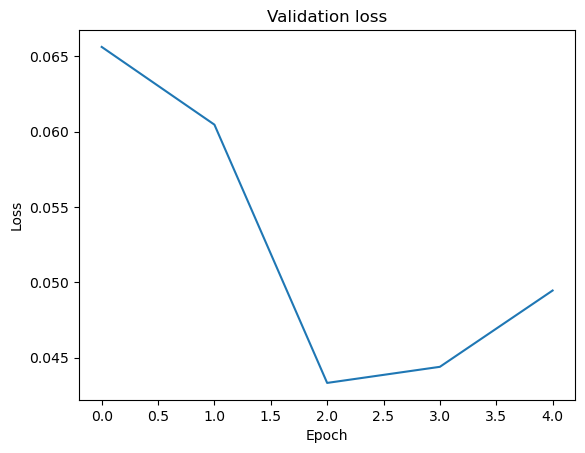

In [9]:
# Plot validation loss
plt.plot(history.history['val_loss'])
plt.title("Validation loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

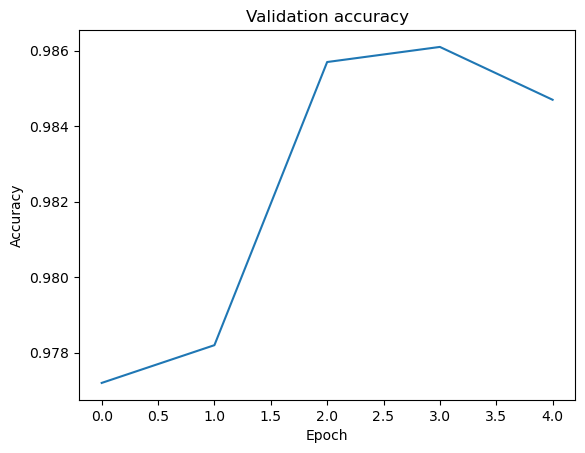

In [10]:
# Plot validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title("Validation accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [11]:
# Load the best weights
model.load_weights("best_weights_mnist.h5")


In [12]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.043319907039403915
Test Accuracy: 0.9857000112533569
